In [29]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import IPython.display as ipd

In [30]:
audio_path = './audios/cat/cat_1.wav'
x , sr = librosa.load(audio_path)

In [31]:
ipd.Audio(audio_path)

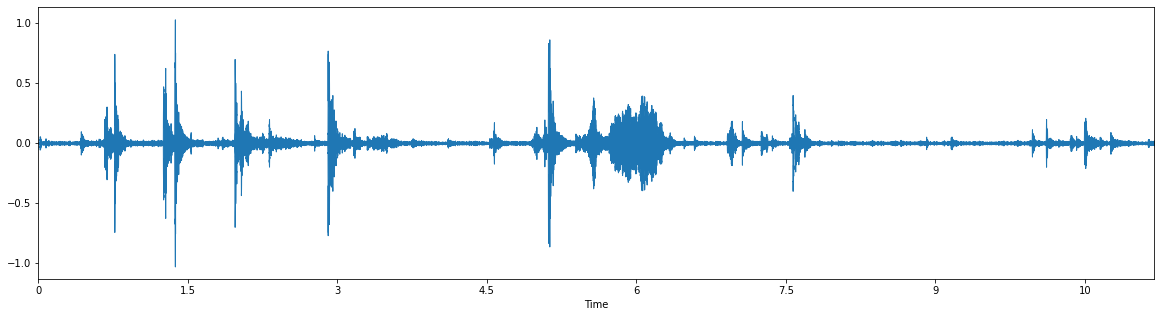

In [32]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

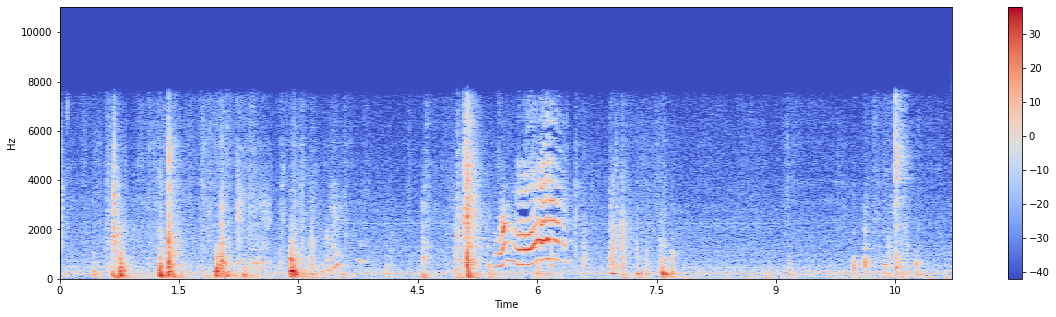

In [33]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

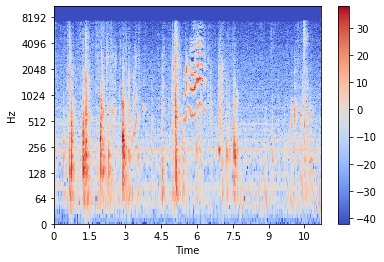

In [34]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [35]:
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

In [36]:
# Playing the sound

ipd.Audio(x, rate=sr) # load a NumPy array

# Feature extraction

In [37]:
x, sr = librosa.load('./audios/cat/cat_1.wav')
ipd.Audio(x, rate=sr)

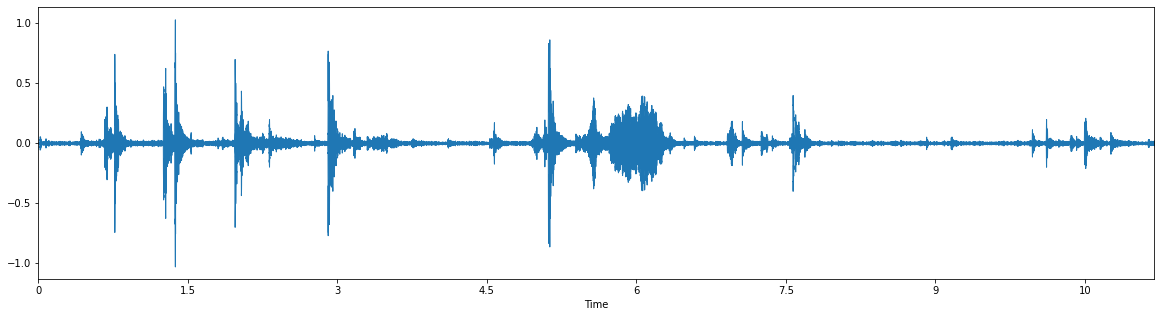

In [38]:
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

## 1. Zero Crossing Rate

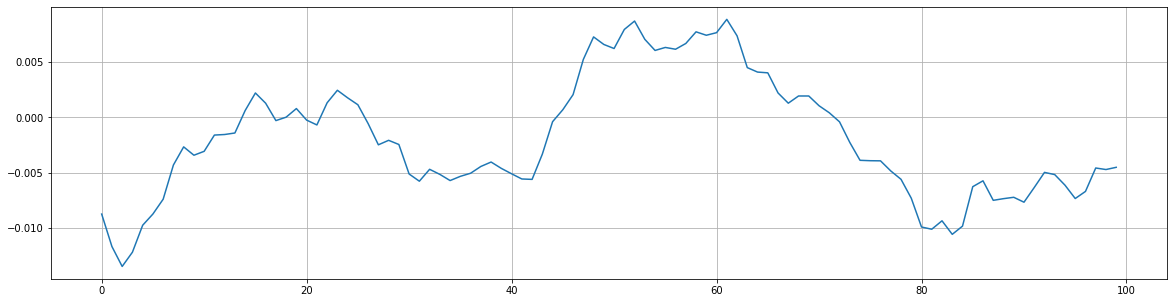

In [39]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

In [40]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [41]:
print(sum(zero_crossings))

8


## 2. Spectral Centroid

In [42]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(483,)

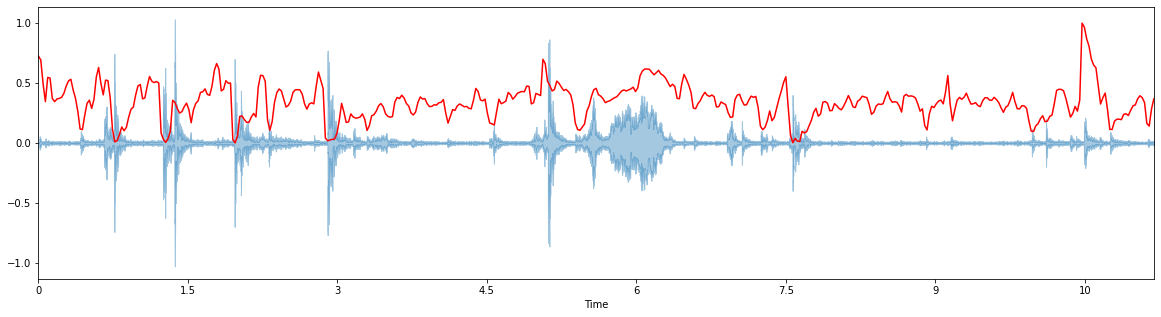

In [43]:
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## 3. Spectral Rolloff

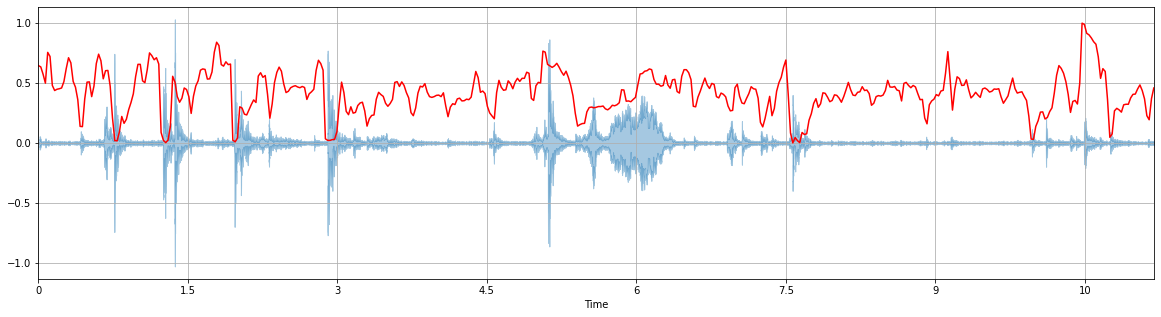

In [44]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

## 4. MFCC

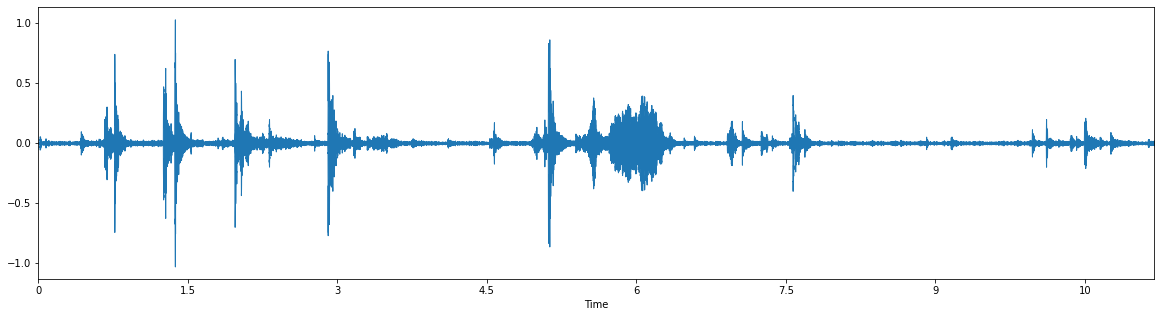

In [45]:
plt.figure(figsize=(20,5))
x, fs = librosa.load('./audios/cat/cat_1.wav')
librosa.display.waveplot(x, sr=sr)

(20, 483)


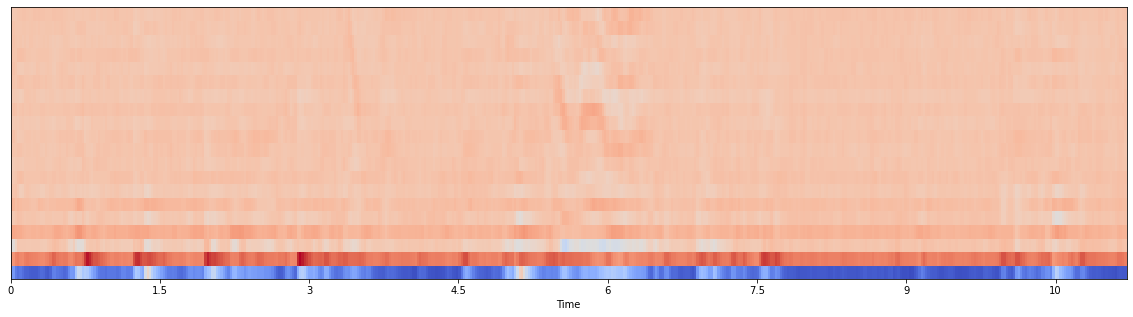

In [46]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')